# Lab 4 - Spatial Data Structures in Python

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

pd.options.display.max_rows = 10

## Importing geospatial data

In [4]:
countries = geopandas.read_file("ne_110m_admin_0_countries.shp")
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,AGO,Angola,Africa,29310273.0,189000.0,(POLYGON ((23.90415368011818 -11.7222815894063...
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.0200403174764 40.84272695572588, ..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,ARG,Argentina,South America,44293293.0,879400.0,(POLYGON ((-66.95992000000001 -54.896810000000...


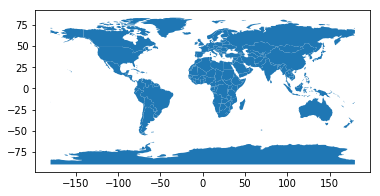

In [5]:
countries.plot()

## What's a GeoDataFrame?

In [6]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [7]:
countries.geometry

0      POLYGON ((61.21081709172574 35.65007233330923,...
1      (POLYGON ((23.90415368011818 -11.7222815894063...
2      POLYGON ((21.0200403174764 40.84272695572588, ...
3      POLYGON ((51.57951867046327 24.24549713795111,...
4      (POLYGON ((-66.95992000000001 -54.896810000000...
                             ...                        
172    (POLYGON ((167.844876743845 -16.46633310309713...
173    POLYGON ((52.00000980002224 19.0000033635161, ...
174    POLYGON ((19.89576785653443 -24.76779021576059...
175    POLYGON ((23.21504845550606 -17.52311614346598...
176    POLYGON ((29.43218834810904 -22.09131275806759...
Name: geometry, Length: 177, dtype: object

In [8]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [9]:
countries.geometry.area

0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

In [10]:
countries['pop_est'].mean()

41712369.84180791

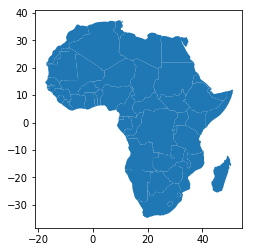

In [11]:
africa = countries[countries['continent'] == 'Africa']
africa.plot()

## Geometries: Points, Linestrings and Polygons

In [12]:
print(countries.geometry[2])

POLYGON ((21.0200403174764 40.84272695572588, 20.99998986174722 40.58000397395401, 20.67499677906363 40.43499990494303, 20.61500044117275 40.11000682225935, 20.15001590341052 39.62499766698397, 19.98000044117015 39.69499339452341, 19.96000166187321 39.91500580500605, 19.40608198413673 40.25077342382247, 19.31905887215714 40.72723012955356, 19.40354983895429 41.40956574153546, 19.54002729663711 41.71998607031276, 19.37176883309496 41.87754751237065, 19.37176816334725 41.8775506797835, 19.30448611825079 42.19574514420782, 19.73805138517963 42.68824738216557, 19.80161339689869 42.50009349219084, 20.07070000000004 42.58863000000008, 20.28375451018189 42.32025950781508, 20.52295000000004 42.21787000000006, 20.59024654668023 41.85540891928363, 20.59024743010491 41.85540416113361, 20.4631750830992 41.51508901627534, 20.60518191903736 41.08622630468523, 21.0200403174764 40.84272695572588))


In [13]:
cities = geopandas.read_file("ne_110m_populated_places.shp")
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


In [14]:
rivers = geopandas.read_file("ne_50m_rivers_lake_centerlines.shp")
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


## The `shapely` library

In [15]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

In [17]:
from shapely.geometry import Point, Polygon, LineString
p = Point(1, 1)
print(p)

POINT (1 1)


In [18]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

## Plotting our different layers together

[(-40, 40), (-20, 60)]

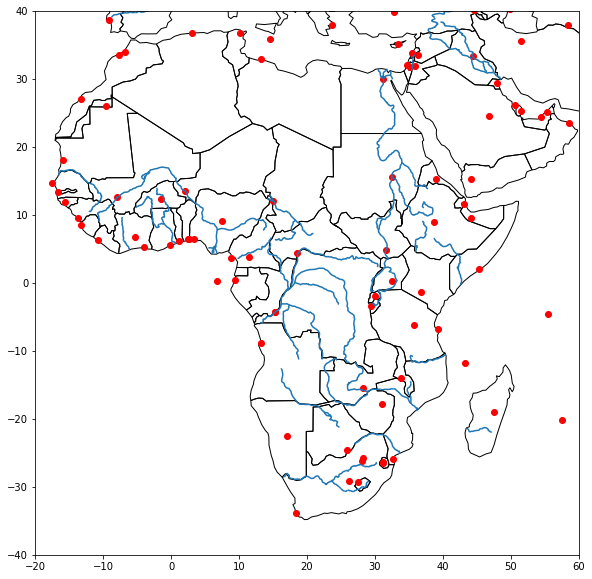

In [19]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

## Let's practice!

### Exercise 1

In [22]:
districts = geopandas.read_file("paris_districts_utm.geojson")
stations = geopandas.read_file("paris_sharing_bike_stations_utm.geojson")
type(districts)

geopandas.geodataframe.GeoDataFrame

In [23]:
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.1333912524 5411438.484355546,..."
1,2,Halles,8984,"POLYGON ((452278.4194036503 5412160.89282334, ..."
2,3,Palais-Royal,3195,"POLYGON ((451553.8057660239 5412340.522224233,..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.907944323 5412654.094913081, ..."
4,5,Gaillon,1345,"POLYGON ((451328.7522686935 5412991.278156867,..."


In [24]:
stations.head()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (450804.448740735 5409797.268203795)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (456414.3523840572 5410698.461014213)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (456366.9088116739 5411563.319737446)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (458730.7071295079 5411789.995450836)
4,43006 - MINIMES (VINCENNES),28,27,POINT (458234.9299846432 5409991.066579348)


### Exercise 2

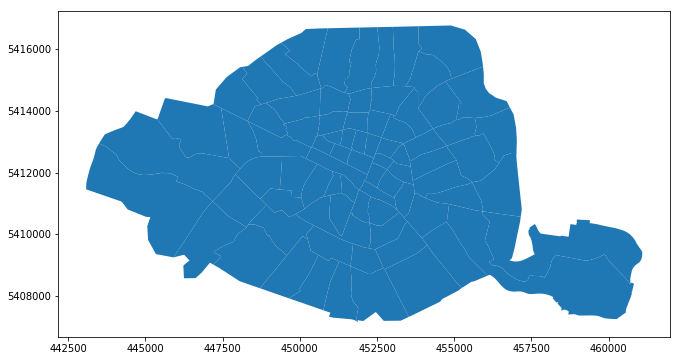

In [25]:
districts.plot(figsize=(12, 6))

### Exercise 3

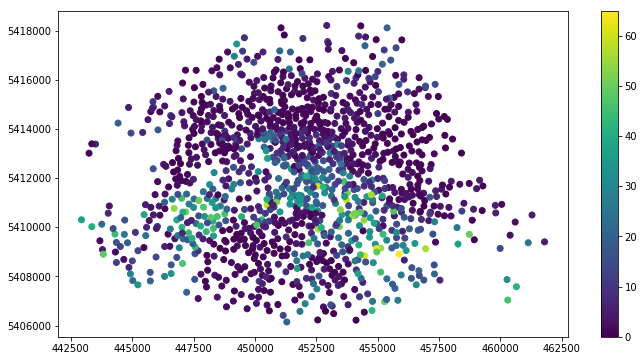

In [26]:
stations.plot(figsize=(12, 6), column = 'available_bikes', legend=True)

### Exercise 4

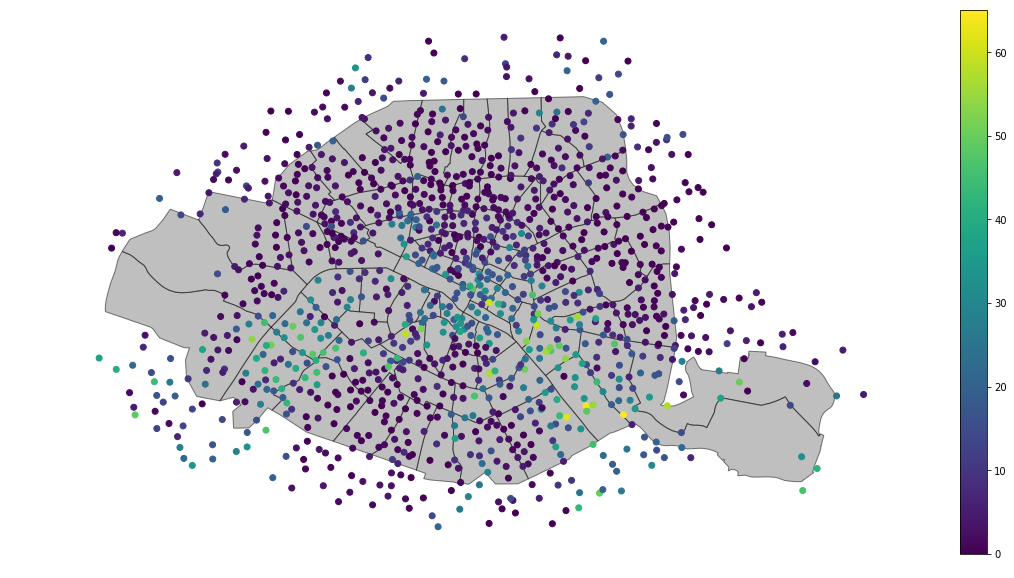

In [31]:
ax = districts.plot(color = 'grey', alpha=0.5, edgecolor = 'k', figsize=(20,10))
stations.plot(ax=ax, column = 'available_bikes', legend=True)
ax.set_axis_off()

### Exercise 5

In [40]:
districts.loc[districts.geometry.area.idxmax()]

id                                                              46
district_name                                               Picpus
population                                                   62947
geometry         POLYGON ((456790.7592171417 5408686.978090666,...
Name: 45, dtype: object

### Exercise 6

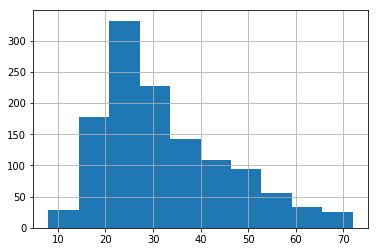

In [41]:
stations['bike_stands'].hist()

## Coordinate reference systems

In [59]:
countries.crs

{'init': 'epsg:4326'}

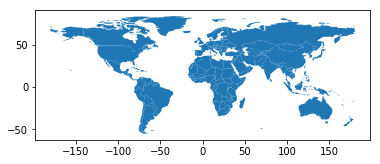

In [60]:
countries.plot()

In [61]:
countries = countries[(countries['name'] != "Antarctica")]

In [68]:
countries_mercator = countries.to_crs(epsg=3395)

RuntimeError: b'no arguments in initialization list'

I keep running into this runtime error with either method of using to_crs. It appears to be an issue with the pyproj package, but reinstalling the package did not alleviate the issue.

## A bit more on importing and creating GeoDataFrames

### Note on `fiona`

In [71]:
import fiona
from shapely.geometry import shape

with fiona.drivers():
    with fiona.open("ne_110m_admin_0_countries.shp") as collection:
        for feature in collection:
            # ... do something with geometry
            geom = shape(feature['geometry'])
            # ... do something with properties
            print(feature['properties']['name'])

Afghanistan
Angola
Albania
United Arab Emirates
Argentina
Armenia
Antarctica
Fr. S. Antarctic Lands
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahamas
Bosnia and Herz.
Belarus
Belize
Bolivia
Brazil
Brunei
Bhutan
Botswana
Central African Rep.
Canada
Switzerland
Chile
China
Côte d'Ivoire
Cameroon
Dem. Rep. Congo
Congo
Colombia
Costa Rica
Cuba
N. Cyprus
Cyprus
Czechia
Germany
Djibouti
Denmark
Dominican Rep.
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Is.
France
Gabon
United Kingdom
Georgia
Ghana
Guinea
Gambia
Guinea-Bissau
Eq. Guinea
Greece
Greenland
Guatemala
Guyana
Honduras
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica
Jordan
Japan
Kazakhstan
Kenya
Kyrgyzstan
Cambodia
South Korea
Kosovo
Kuwait
Laos
Lebanon
Liberia
Libya
Sri Lanka
Lesotho
Lithuania
Luxembourg
Latvia
Morocco
Moldova
Madagascar
Mexico
Macedonia
Mali
Myanmar
Montenegro
Mongolia
Mozambique
Mauritania
Malawi
Malaysia

C:\Users\Ali\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:4: FionaDeprecationWarning: Use fiona.Env() instead.
  after removing the cwd from sys.path.


### Constructing a GeoDataFrame manually

In [72]:
geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

,geometry,attribute1,attribute2
0,POINT (1 1),1,0.1
1,POINT (2 2),2,0.2


### Creating a GeoDataFrame from an existing dataframe

In [73]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

df['Coordinates']  = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)

gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
gdf

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)
